In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [17]:
np.random.seed(8)
tf.random.set_seed(8)

In [18]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [19]:
# Select the two relevant columns and re assign to our data frame
df = df[['airline_sentiment', 'text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<AxesSubplot:>

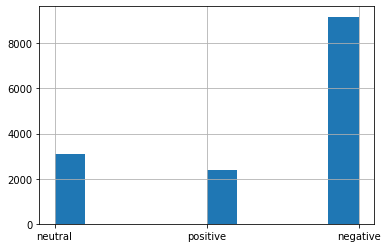

In [20]:
df['airline_sentiment'].hist()

<AxesSubplot:>

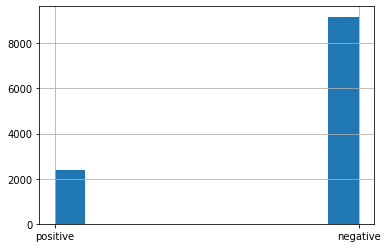

In [21]:
# Filter out all neutral tweets, we want only positive & negative tweets
df = df[df['airline_sentiment'] != 'neutral'].copy()
df['airline_sentiment'].hist()

In [22]:
# encode the labels to digits
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['labels'] = encoder.fit_transform(df['airline_sentiment'])
df.head()

,airline_sentiment,text,labels
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


Positev = 1, negative = 0


In [23]:
# Split data into train and test
df_train, df_test = train_test_split(df, random_state=42)

In [24]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.fit_transform(df_test['text'])

Y_train = df_train['labels']
Y_test = df_test['labels']

In [25]:
# Data must not be sparse matrix before passing into tensorflow
X_train = X_train.toarray()
X_test = X_test.toarray()

In [26]:
# input dimensions
D = X_train.shape[1]

In [27]:
# Building model
i = Input(shape=(D,))
x = Dense(1)(i) # sigmoid included in loss
model = Model(i, x)

In [28]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2000)]            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2001      
Total params: 2,001
Trainable params: 2,001
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(
    loss=BinaryCrossentropy(from_logits=True),
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy']
             )

In [30]:
r = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=40,
    batch_size=128,
)

Epoch 1/40
68/68 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.7920 - val_loss: 0.4963 - val_accuracy: 0.8049
Epoch 2/40
68/68 [==============================] - 0s 2ms/step - loss: 0.3760 - accuracy: 0.7961 - val_loss: 0.4843 - val_accuracy: 0.8049
Epoch 3/40
68/68 [==============================] - 0s 2ms/step - loss: 0.3223 - accuracy: 0.8180 - val_loss: 0.4805 - val_accuracy: 0.8053
Epoch 4/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2849 - accuracy: 0.8458 - val_loss: 0.4781 - val_accuracy: 0.8049
Epoch 5/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.8635 - val_loss: 0.4796 - val_accuracy: 0.8049
Epoch 6/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2368 - accuracy: 0.8816 - val_loss: 0.4822 - val_accuracy: 0.8053
Epoch 7/40
68/68 [==============================] - 0s 2ms/step - loss: 0.2204 - accuracy: 0.8925 - val_loss: 0.4869 - val_accuracy: 0.8042
Epoch 8/40
68/68 [==

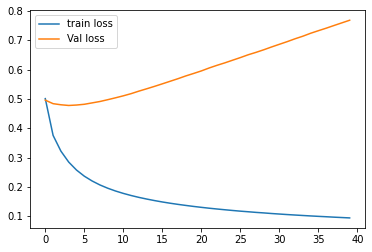

In [31]:
# Plot loss per itration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='Val loss')
plt.legend()

We could use callback to save the best model during training, according to validation loss.
This help us reduce overfitting and/or underfitting.


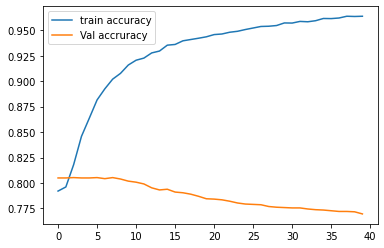

In [32]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train accuracy')
plt.plot(r.history['val_accuracy'], label='Val accruracy')
plt.legend()

In [33]:
P_train = ((model.predict(X_train) > 0) * 1.0).flatten()
P_test = ((model.predict(X_test) > 0) *1.0).flatten()

In [35]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.99008023, 0.00991977],
       [0.09166667, 0.90833333]])

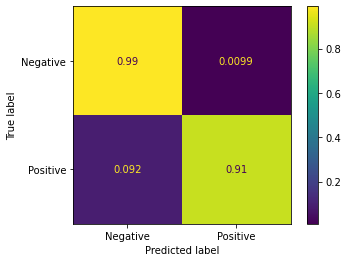

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay
classes = ['Negative',  'Positive']
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=classes)
disp.plot()
plt.show()

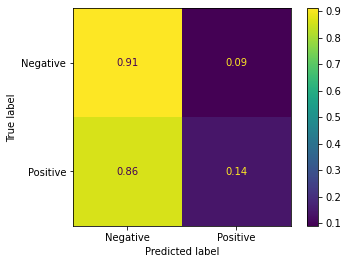

In [37]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classes)

disp.plot()
plt.show()

In [40]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print("Train AUC: ", roc_auc_score(Y_train, Pr_train))
print("Test AUC: ", roc_auc_score(Y_test, Pr_test))

Train AUC:  0.9949575330253668
Test AUC:  0.5641713989917796


In [42]:
print("Train F1: ", f1_score(Y_train, P_train))
print("Test F1: ", f1_score(Y_test, P_test))

Train F1:  0.9334855837853269
Test F1:  0.18352941176470589


In [43]:
model.layers

In [44]:
model.layers[1].get_weights()

[array([[-3.7698677],
        [ 3.2906983],
        [-1.5295539],
        ...,
        [ 2.0172827],
        [ 1.6173306],
        [-3.020381 ]], dtype=float32),
 array([-0.21470597], dtype=float32)]

In [45]:
w = model.layers[1].get_weights()[0]

In [46]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'usairways': 1885,
 'they': 1785,
 'charged': 302,
 'me': 1108,
 'for': 673,
 'flight': 642,
 'cancelled': 274,
 'flightled': 651,
 'unbelievable': 1860,
 'and': 129,
 'of': 1248,
 'jetblue': 941,
 'great': 760,
 'view': 1900,
 'http': 856,
 'co': 334,
 'united': 1868,
 're': 1466,
 'not': 1224,
 'actually': 82,
 'gate': 724,
 'agent': 95,
 'was': 1915,
 'so': 1681,
 'rude': 1581,
 'now': 1237,
 'standing': 1709,
 'in': 882,
 'line': 1021,
 'waiting': 1911,
 'reflight': 1490,
 'booking': 237,
 'problems': 1424,
 'missed': 1158,
 'the': 1779,
 'only': 1273,
 'to': 1809,
 'awful': 191,
 'americanair': 124,
 'no': 1216,
 'worries': 1974,
 'called': 269,
 'back': 194,
 'hrs': 855,
 'late': 987,
 'flightr': 654,
 'while': 1946,
 'took': 1817,
 'an': 128,
 'additional': 86,
 '200': 20,
 'fee': 607,
 'by': 264,
 'aa': 63,
 'everything': 548,
 'gr8': 759,
 'thank': 1774,
 'you': 1993,
 'there': 1783,
 'one': 1270,
 'here': 817,
 'few': 615,
 'months': 1170,
 'ago': 97,
 'but': 261,
 'none': 1

In [48]:
threshold = 2

print("Most positive words: ")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight > threshold:
        word_weight_tuples.append((word, weight))
        
word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])
for i in range(10):
    word, weight = word_weight_tuples[i]
    print(word, weight)

Most positive words: 
stranded 9.665014
stressful 9.358626
wondering 8.401731
hi 7.955782
best 7.348615
luck 7.2081614
flight 7.1200485
least 6.74629
anymore 6.4926224
broken 6.1698003


The model is working the other way around lol